# Method 1 Response Clustering, method 1 ranking

In [9]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sentence_transformers import SentenceTransformer
model = SentenceTransformer('bert-base-nli-stsb-mean-tokens')

### Survey Clean file

In [10]:
# Read it in
survey_64 = pd.read_csv('https://raw.githubusercontent.com/amos3vt/ASWW2/master/data/survey_64%20(1).csv')

no_float = [i for i in survey_64['T7'].tolist() if type(i) != float]
no_unclear = [i for i in no_float if '[unclear]' not in i]
responseList = no_unclear

### DEIM-CUR functions

In [11]:
def cur(A, idx=False, SVD=None, rank=None):
    
    if SVD==None:
        SVD = np.linalg.svd(A, full_matrices=False)
    if rank==None:
        rank = np.linalg.matrix_rank(A)
    
    V,S,Wt = SVD
    
    def DEIM(M): # row/column selection
        p = []
        p.append(np.argmax(np.abs(M[:,0]))) # row index of the largest value in the first column of M
        for i in range(1,rank):
            res = M[:,i] - np.dot(M[:,:i],np.dot(np.linalg.inv(M[:,:i][p]), M[:,i][p]))
            p.append(np.argmax(np.abs(res)))
        return p
    
    p_C = DEIM(np.transpose(Wt))
    C = A[:,p_C]
    
    p_R = DEIM(V)
    R = A[p_R]
    
    U = np.linalg.pinv(C) @ A @ np.linalg.pinv(R)
    
    return (C,U,R, p_C, p_R) if idx else (C,U,R)

In [12]:
embed_response = (model.encode(responseList))

### Top Responses for responses (without clustering)

In [13]:
C_1,U_1,R_1, p_C_1, p_R_1 = cur(np.transpose(embed_response), idx=True)

In [15]:
print("Without Clustering\n")
for i in range(20):
    print(responseList[p_C_1[i]])

Without Clustering

I think there is too much time wasted in useless training. The training period could be much shorter. This would produce more efficient soldiers as they would not lose interest in what they were doing. I think a greater effort should be made to place men in the positions where they could do their best work. I think the army could profit form more suggestions from the men. Also, the
Officers & non-coms (non-commissioned officers) are very poorly chosen - too little consideration given their mental equipment & descending [condescending] of character & feelings.
The main "bitch" that I have is as usual the furlough. I have been in 7 months and I don't think I will get one as we are alerted. I spent 8 weeks in a camp 3 hrs from home and wasn't permitted to go home at all.
I don't think a man unphysically fit for the army should be in service.
There are men highly skilled in jobs that are classified to that job, send to school in different and then sent to a technical ou

## Eigenvalue Graphs

In [16]:
first = pd.DataFrame({'Response': responseList, 'Embedding': embed_response})
second = pd.DataFrame({'Response': responseList})

In [17]:
for i in range(0, 768):
    x = []
    for j in range(0, len(embed_response)):
        x.append(first['Embedding'][j][i])
    second['x'+str(i)] = x
    
second.iloc[:,1:]

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x758,x759,x760,x761,x762,x763,x764,x765,x766,x767
0,0.169956,0.576175,0.305210,0.889021,-0.359807,-0.387795,0.933715,-0.641726,0.713522,-1.128619,...,-0.462090,0.065173,0.193122,-1.231526,-0.355753,0.271332,-0.025953,-0.001147,0.166827,0.423498
1,0.131383,-0.240392,0.872917,0.483824,-1.149685,0.287036,0.585074,-0.262572,0.772228,-0.179391,...,-0.049259,0.576768,1.236887,-0.686871,-0.362478,0.570970,-0.175608,-0.501856,-0.860414,0.394547
2,-0.336062,-0.347913,-0.215168,0.729264,-0.766587,-0.211024,0.488620,0.289371,0.190471,-0.612177,...,-0.478334,0.109539,0.124972,-2.683814,-0.385821,0.323180,-0.276944,0.872119,-0.232831,0.868794
3,-0.108661,0.008074,-0.312806,0.250400,-0.710667,-0.460732,0.253227,0.303874,0.448702,-0.627768,...,-0.856360,-0.827714,-0.220486,-1.702027,-0.264303,-0.171332,-0.294635,0.232948,0.300350,-0.145931
4,0.202234,0.478865,0.212403,-0.135441,0.298303,-0.182391,0.193854,-0.169043,0.185456,-0.668663,...,-0.031739,-0.189297,-0.570148,-0.848235,0.965863,0.025384,0.185035,-0.278375,-0.574916,0.006843
5,-0.088382,0.362954,0.284934,0.004831,0.489150,0.675873,0.365730,0.147547,-1.032685,-0.164218,...,-0.280511,-0.233706,0.458057,-0.528324,-0.216538,-0.058426,-0.146716,1.112407,-0.060235,0.184464
6,0.444734,0.014704,0.431642,-0.152115,0.407878,0.073410,0.911415,-0.294390,0.032836,-1.539492,...,-0.182933,0.317133,0.582221,-1.766440,-0.489173,0.677928,-0.363176,0.842360,-0.025921,0.091820
7,-0.048219,0.015311,0.859537,0.097289,-0.154143,-0.524913,0.606578,-0.546092,-0.103928,-0.572992,...,-0.243061,0.148650,0.171414,-1.614398,-0.501247,-0.233415,0.017473,1.201802,-0.454000,0.196047
8,-0.584153,0.048079,0.386686,0.028572,0.059856,-0.394835,0.778114,-0.391048,0.366425,-0.971533,...,-0.692479,-0.237202,0.108541,-1.284717,-0.818274,0.007424,-0.410522,0.423360,-0.880238,0.116402
9,-0.597591,0.101505,0.285013,0.979855,-0.230350,-0.274158,0.047768,-0.418555,-0.272099,-0.880474,...,-0.510752,0.290679,0.504492,-1.824323,-0.702003,0.242723,0.172776,0.900818,-0.199072,1.127029


In [18]:
import seaborn as sns
sns.set_style('darkgrid', {'axes.facecolor': '.9'})
sns.set_palette(palette='deep')
sns_c = sns.color_palette(palette='deep')

from sklearn.neighbors import kneighbors_graph
from scipy import sparse

def generate_graph_laplacian(df, nn):
    """Generate graph Laplacian from data."""
    # Adjacency Matrix.
    connectivity = kneighbors_graph(X=df, n_neighbors=nn, mode='connectivity')
    adjacency_matrix_s = (1/2)*(connectivity + connectivity.T)
    # Graph Laplacian.
    graph_laplacian_s = sparse.csgraph.laplacian(csgraph=adjacency_matrix_s, normed=False)
    graph_laplacian = graph_laplacian_s.toarray()
    return graph_laplacian 
    
graph_laplacian = generate_graph_laplacian(df=second.iloc[:,1:], nn=8)

In [19]:
from scipy import linalg

eigenvals, eigenvcts = linalg.eig(graph_laplacian)
np.unique(np.imag(eigenvals))

array([0.])

In [20]:
# We project onto the real numbers. 
def compute_spectrum_graph_laplacian(graph_laplacian):
    """Compute eigenvalues and eigenvectors and project 
    them onto the real numbers.
    """
    eigenvals, eigenvcts = linalg.eig(graph_laplacian)
    eigenvals = np.real(eigenvals)
    eigenvcts = np.real(eigenvcts)
    return eigenvals, eigenvcts

eigenvals, eigenvcts = compute_spectrum_graph_laplacian(graph_laplacian)

In [21]:
eigenvcts_norms = np.apply_along_axis(
  lambda v: np.linalg.norm(v, ord=1), 
  axis=0, 
  arr=eigenvcts
)

print('Min Norm: ' + str(eigenvcts_norms.min()))
print('Max Norm: ' + str(eigenvcts_norms.max()))

Min Norm: 2.654952672480368
Max Norm: 30.626785662227107


In [22]:
eigenvals_sorted_indices = np.argsort(eigenvals)
eigenvals_sorted = eigenvals[eigenvals_sorted_indices]

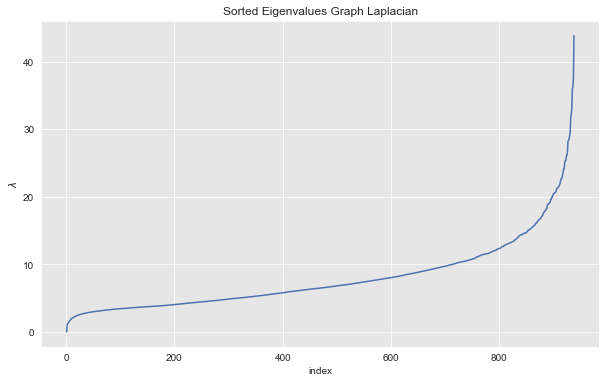

In [23]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.lineplot(x=range(1, eigenvals_sorted_indices.size + 1), y=eigenvals_sorted, ax=ax)
ax.set(title='Sorted Eigenvalues Graph Laplacian', xlabel='index', ylabel=r'$\lambda$');

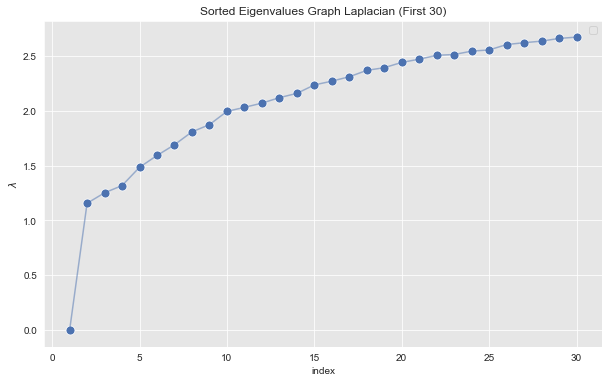

In [24]:
index_lim = 30

fig, ax = plt.subplots(figsize=(10, 6))
sns.scatterplot(x=range(1, eigenvals_sorted_indices[: index_lim].size + 1), y=eigenvals_sorted[: index_lim], s=80, ax=ax)
sns.lineplot(x=range(1, eigenvals_sorted_indices[: index_lim].size + 1), y=eigenvals_sorted[: index_lim], alpha=0.5, ax=ax)
# ax.axvline(x=3, color=sns_c[3], label='zero eigenvalues', linestyle='--')
ax.legend()
ax.set(title=f'Sorted Eigenvalues Graph Laplacian (First {index_lim})', xlabel='index', ylabel=r'$\lambda$');

## Spectral Clustering on responses

In [25]:
n=4

from sklearn.cluster import SpectralClustering
spectral = SpectralClustering(n_clusters=n,affinity='nearest_neighbors').fit(second.iloc[:, 1:])
first['Cluster'] = [i for i in spectral.labels_]
first['bag'] = first.Response.map(lambda t:t.replace(';','').lower().split())

In [26]:
first.head()

,Response,Embedding,Cluster,bag
0,There is such a thing as prejudice in this arm...,"[0.16995625, 0.57617545, 0.30520982, 0.8890208...",0,"[there, is, such, a, thing, as, prejudice, in,..."
1,I'll like to go into combat and fight. That's ...,"[0.13138308, -0.2403918, 0.8729168, 0.48382372...",2,"[i'll, like, to, go, into, combat, and, fight...."
2,I think the army would be a lot better if the ...,"[-0.33606222, -0.34791282, -0.21516822, 0.7292...",0,"[i, think, the, army, would, be, a, lot, bette..."
3,I think some outfits get more breaks than othe...,"[-0.10866149, 0.008073718, -0.31280592, 0.2504...",0,"[i, think, some, outfits, get, more, breaks, t..."
4,As a quarter master outfit I feel like we shou...,"[0.20223399, 0.47886506, 0.2124034, -0.1354406...",0,"[as, a, quarter, master, outfit, i, feel, like..."


In [27]:
responseClusters = first
responseClusters.drop(columns=['bag'], inplace=True)
responseClusters.head()

,Response,Embedding,Cluster
0,There is such a thing as prejudice in this arm...,"[0.16995625, 0.57617545, 0.30520982, 0.8890208...",0
1,I'll like to go into combat and fight. That's ...,"[0.13138308, -0.2403918, 0.8729168, 0.48382372...",2
2,I think the army would be a lot better if the ...,"[-0.33606222, -0.34791282, -0.21516822, 0.7292...",0
3,I think some outfits get more breaks than othe...,"[-0.10866149, 0.008073718, -0.31280592, 0.2504...",0
4,As a quarter master outfit I feel like we shou...,"[0.20223399, 0.47886506, 0.2124034, -0.1354406...",0


### Cluster 0 Top Responses

In [28]:
is_0 = first['Cluster'] == 0
cluster_0 = first[is_0]

cluster_0

,Response,Embedding,Cluster
0,There is such a thing as prejudice in this arm...,"[0.16995625, 0.57617545, 0.30520982, 0.8890208...",0
2,I think the army would be a lot better if the ...,"[-0.33606222, -0.34791282, -0.21516822, 0.7292...",0
3,I think some outfits get more breaks than othe...,"[-0.10866149, 0.008073718, -0.31280592, 0.2504...",0
4,As a quarter master outfit I feel like we shou...,"[0.20223399, 0.47886506, 0.2124034, -0.1354406...",0
6,I think that when a man is inducted into the A...,"[0.4447335, 0.014703848, 0.43164206, -0.152114...",0
7,It takes too long to relieve a man when he is ...,"[-0.04821922, 0.015311183, 0.85953707, 0.09728...",0
8,There could be better arrangements made as to ...,"[-0.58415264, 0.048078883, 0.38668603, 0.02857...",0
9,"This Army is run by Officers who, as long as t...","[-0.59759074, 0.101505496, 0.2850132, 0.979855...",0
10,The Private should get more than $50 a month b...,"[-0.66859406, -0.62227434, -0.5143613, 0.67077...",0
11,I think that this outfit that we are in don't ...,"[0.29910952, 0.62321395, 0.45757335, 0.1715115...",0


In [29]:
cluster0List = cluster_0['Response'].tolist()

In [30]:
embed0 = np.transpose(model.encode(cluster0List))

In [31]:
C_0,U_0,R_0, p_C_0, p_R_0 = cur(embed0, idx=True)

In [32]:
print("Cluster 0\n")
for i in range(5):
    print(i,':', responseList[p_C_0[i]],'\n')

Cluster 0

0 : 26 I contributed more in one week in my former defense job than I have had the opportunity to do in the army for the entire time. Have not been given much of an opportunity to show anything and denied everything I asked for and generally got a raw deal. There is no morale at Drew Field. 

1 : About passes a solger [soldier] should have at list 3 days off of each month it helps to keep the spirit and not git [get] restless insted at been in dutty [duty] all the time like a convic [convict] in a prishene [prison] with out any liverty [liberty] at all a guy gits [gets] disgusted findly [finally] go over the hill & I don't blame a lots of solgers [soldiers] to go AWOL 

2 : I don't see why in heck a man has to be tied down as cadre in Camp Roberts. I think L.S. [Logistics Support] should take over and let the men that want to fight get the hell out of here where they can do some good. 

3 : Yes We haven't any recreational facilities in this camp. The civilians and soldiers w

### Cluster 1 Top Responses

In [33]:
is_1 = first['Cluster'] == 1
cluster_1 = first[is_1]
cluster1List = cluster_1['Response'].tolist()

In [34]:
embed1 = np.transpose(model.encode(cluster1List))

In [35]:
C_1,U_1,R_1, p_C_1, p_R_1 = cur(embed1, idx=True)

In [36]:
print("Cluster 1\n")
for i in range(5):
    if(i<len(p_C_1)):
        print(i,':', responseList[p_C_1[i]],'\n')

Cluster 1

0 : I think that of a family with a few boys in the service at least one should be left at home and take care of, and be around his folks. [paragraph] If an enlisted man knows he can do better on another outfit he should be let [allowed] get a transfer. 

1 : If men can interest themselves in what ever they're doing and realize the importance of it, there would be fewer awol's and better trained men. 

2 : I am sorry I could not finish my last quarter year at college. The E.R.C.'s was a bad deal to catch men in. I do believe the government or War Dept. could do better by fairness. 

3 : The army should end or eliminate red tape, inconsistency of rules and a better public information service as to how the Army operates and what the public should expect of the Army. 

4 : We are a Quartermaster Regiment but sometimes we don't drive a truck for two weeks at a time, although most of us drove in civilian life, the army trucks are quite different and it takes practice on any job t

In [37]:
cluster_1

,Response,Embedding,Cluster
18,"As a QM Sgt, we don't get all the truck drivin...","[-0.07455401, 0.48327082, 0.62872845, -0.05749...",1
22,There is too much flexibility in the rules and...,"[-0.2958298, 0.21606672, 0.12410726, 0.4078283...",1
32,The army could be better if they give us the r...,"[0.26695275, -0.3624393, -0.25332117, 0.393793...",1
69,Our Army could Mess Sergeants who can explain ...,"[0.39852637, 0.9879159, 0.23610878, 0.129945, ...",1
82,We aren't given all the food we can eat and it...,"[0.35102722, 0.056284726, -0.45074183, -0.1082...",1
92,Food is not as good as people say the army...,"[0.24809144, -0.15532611, -0.38149637, 0.68278...",1
98,I would like to be back in what I was trained ...,"[0.16102979, -0.28496212, 0.742872, 0.11508451...",1
101,"All I have to gripe about, is the way they sti...","[0.42134076, 0.09913038, 0.2492455, -0.0581481...",1
102,I think the food could be a lot better and cle...,"[-0.38501436, -0.46000928, 0.48478392, 0.31641...",1
103,They should never make noncoms out of men that...,"[0.03368818, 0.2127931, 0.48061496, -0.4075943...",1


### Cluster 2 Top Responses

In [38]:
is_2 = first['Cluster'] == 2
cluster_2 = first[is_2]
cluster2List = cluster_2['Response'].tolist()

In [39]:
embed2 = np.transpose(model.encode(cluster2List))

In [40]:
C_2,U_2,R_2, p_C_2, p_R_2 = cur(embed2, idx=True)

In [41]:
print("Cluster 2\n")
for i in range(5):
    if(i<len(p_C_2)):
        print(i,':', responseList[p_C_2[i]],'\n')

Cluster 2

0 : When they do things I wish they would do it right the first time, so we wouldn't have to do over & over again I mean working on the guns or firing them. 

1 : I am sorry I could not finish my last quarter year at college. The E.R.C.'s was a bad deal to catch men in. I do believe the government or War Dept. could do better by fairness. 

2 : I think that of a family with a few boys in the service at least one should be left at home and take care of, and be around his folks. [paragraph] If an enlisted man knows he can do better on another outfit he should be let [allowed] get a transfer. 

3 : The Army makes statements about placing the men where best suited but in most case (cases) where most needed. A man with expericense (experience) in a Post Artillery is sent to a different branch of service altogether lines to him and if he fear a rating and cannot come up[ to par in a certain time is busted to a private when he could be in the line he has the best knowledge of but n

### Cluster 3 Top Responses

In [42]:
is_3 = first['Cluster'] == 3
cluster_3 = first[is_3]
cluster3List = cluster_3['Response'].tolist()

In [43]:
embed3 = np.transpose(model.encode(cluster3List))

In [44]:
C_3,U_3,R_3, p_C_3, p_R_3 = cur(embed3, idx=True)

In [45]:
print("Cluster 3\n")
for i in range(5):
    if(i<len(p_C_3)):
        print(i,':', responseList[p_C_3[i]],'\n')

Cluster 3

0 : Our Army could Mess Sergeants who can explain a job better - and just because some Joe has been "hanging" around a comp for years is no reason why he should think he is a general. (paragraph) Goldbricks ought to be given K.P. (Kitchen Patrol) three times a week. 

1 : When I was inducted my Mother and Father were depending on me for support with my allotment it is not enough for them to get along on, with food prices up and taxes so high. 

2 : I've often been very disgusted when picking up a news paper to see the hard line being taken up by some strike and know its bound to affect the boys overseas much more, to think of what they are ?cking and giving. Why can one man have so much power to hinder the war effort and still nothing be done to put him in his place. 

3 : All the further remarks I have in. i hope this war will soon be over so as i can go home again and settle down to civilian life again. Which is going to be quite complicated to me. 

4 : I think that the C